In [37]:
"""
dft_2d.ipynb
En este archivo visualizamos el espectro original al procesar una imagen digital y la aproximación mediante DFT de la FT de una función conocida.
"""
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import os
plt.style.use(["science", "grid"])
FONT_SIZE = 12
plt.rcParams.update({
    'font.size': FONT_SIZE,
    'axes.labelsize': FONT_SIZE,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE
})

In [38]:
# Imagen junto a su DFT y con el plot 3D de la función original
def plot_2dft(N, fun_dft, with_3d_plot=True, tick_interval=32, save_path=None, fun_original=None, fun_ft=None, fun_original_name="", fun_ft_name=""):
    figsize = (6, 6.5) if with_3d_plot else (6, 3)
    dim_1 = 2 if with_3d_plot else 1
    x1 = np.arange(0, N)
    x2 = np.arange(0, N)
    X1, X2 = np.meshgrid(x1, x2)
    X1_SHIFTED = X1 - N / 2
    X2_SHIFTED = X2 - N / 2
    
    f = fun_dft(X1_SHIFTED, X2_SHIFTED)

    F = np.fft.fft2(f)  
    F = np.fft.fftshift(F)

    fig, ax = plt.subplots(dim_1, 2, figsize=figsize) 

    if dim_1 == 1:
        ax = np.array([ax])

    ax[0, 0].invert_yaxis()
    ax[0, 0].imshow(f, extent=[0, N-1, N-1, 0], cmap='gray')
    ax[0, 0].set_title('Imagen original $A$')
    ax[0, 0].grid(False)

    ax[0, 0].set_xticks(np.arange(0, N, tick_interval))
    ax[0, 0].set_yticks(np.arange(0, N, tick_interval))

    magnitude = np.abs(F)
    ax[0, 1].invert_yaxis() 
    ax[0, 1].grid(False)
    ax[0, 1].imshow(magnitude, extent=[0, N-1, N-1, 0], cmap='gray')
    ax[0, 1].set_title(f'$|\hat A|$ = $|$DFT$({N}, {N})|$')

    ax[0, 1].set_xticks(np.arange(0, N, tick_interval))
    ax[0, 1].set_yticks(np.arange(0, N, tick_interval))

    if dim_1 == 2:
        ax[1, 0].set_axis_off()
        ax[1, 1].set_axis_off()

    if with_3d_plot:
        x = np.linspace(-np.pi, np.pi, 64)
        y = np.linspace(-np.pi, np.pi, 64)
        X_CONT, Y_CONT = np.meshgrid(x, y)
        Z_ORIGINAL = fun_original(X_CONT, Y_CONT)
        Z_FT = fun_ft(X_CONT, Y_CONT)

        ax_3d = fig.add_subplot(2, 2, 3, projection='3d')
        ax_3d.plot_surface(X_CONT, Y_CONT, Z_ORIGINAL, cmap='gray', edgecolor='none', antialiased=1, linewidth=0,  shade=True)
        ax_3d.set_title(fun_original_name)
        ax_3d.grid(False)
        ax_3d.set_xticks([-np.pi, 0, np.pi])
        ax_3d.set_yticks([-np.pi, 0, np.pi])
        ax_3d.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
        ax_3d.set_yticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
    
        ax_3d_ft = fig.add_subplot(2, 2, 4, projection='3d')
        ax_3d_ft.plot_surface(X_CONT, Y_CONT, Z_FT, cmap='gray', antialiased=1, edgecolor='none', linewidth=0, shade=True)
        ax_3d_ft.set_title(fun_ft_name)
        ax_3d_ft.grid(False)
        ax_3d_ft.set_xticks([-np.pi, 0, np.pi])
        ax_3d_ft.set_yticks([-np.pi, 0, np.pi])
        ax_3d_ft.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
        ax_3d_ft.set_yticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
        
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)

    return fig, ax

# Imagen junto a su DFT bidimensional
def plot_2dft_image(image, tick_interval=32, save_path=None):
    N, M = image.shape
    figsize = (6, 3)
    
    F = np.fft.fft2(image)  
    F = np.fft.fftshift(F)
    magnitude = np.log(np.abs(F))
    
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax[0].invert_yaxis()
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title(r'Imagen original $A$')
    ax[0].grid(False)
    ax[0].set_xticks(np.arange(0, N, tick_interval))
    ax[0].set_yticks(np.arange(0, M, tick_interval))
    
    ax[1].invert_yaxis()
    ax[1].imshow(magnitude, cmap='gray')
    ax[1].set_title(r'$\log(|\hat A|)$')
    ax[1].grid(False)
    ax[1].set_xticks(np.arange(0, N, tick_interval))
    ax[1].set_yticks(np.arange(0, M, tick_interval))
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300)
    
    return fig, ax


<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:33: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_39738/2518922540.py:33: SyntaxWarning: invalid escape sequence '\h'
  ax[0, 1].set_title(f'$|\hat A|$ = $|$DFT$({N}, {N})|$')


/tmp/ipykernel_39738/2518922540.py:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


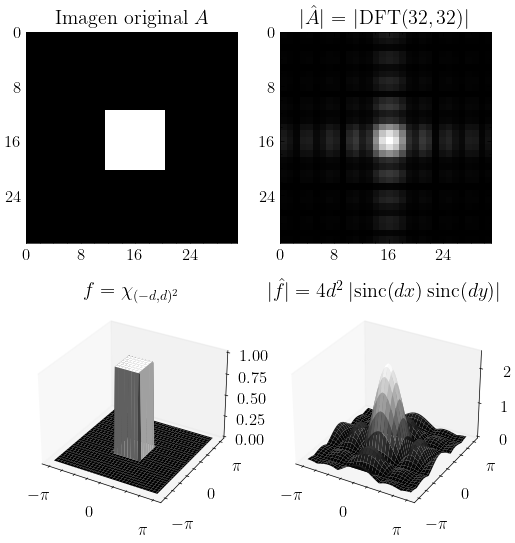

In [39]:
# Función característica bidimensional
def square_function(X1, X2, radius=8):
    return np.logical_and(np.abs(X1) <= radius, np.abs(X2) <= radius).astype(float)

# Valor absoluto del sinc
def abs_sinc_2d(X1, X2, d):
    return (2*d)**2 * np.abs(np.sinc(d * X1) * np.sinc(d * X2))

radius_square = 4
N = 32
continuous_radius = radius_square * 2 * np.pi / N

square_with_radius = lambda X1, X2: square_function(X1, X2, radius=radius_square)
square_with_radius_original = lambda X1, X2: square_function(X1, X2, radius=continuous_radius)

sinc_fun = lambda X1, X2: abs_sinc_2d(X1, X2, d=continuous_radius)

fig, ax = plot_2dft(
    N=N,
    tick_interval=8,
    save_path=os.path.join("plots", "2dft_square.pdf"),
    with_3d_plot=True,
    fun_dft = square_with_radius,
    fun_original= square_with_radius_original,
    fun_ft=sinc_fun,
    fun_original_name = r"$f = \chi_{(-d,d)^2}$",
    fun_ft_name = r"$|\hat f| = 4d^2\:|$sinc$(dx)\:$sinc$(dy)|$"
)


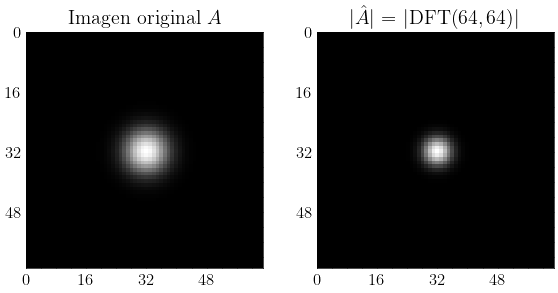

In [40]:
# Distribucción gaussiana
def gauss_distrib(X1, X2, sigma = 4):
    return  1/(2*np.pi*sigma**2) * np.exp(-(X1**2 + X2**2)/(2*sigma**2))
sigma_dft = 4
gauss = lambda X1, X2: gauss_distrib(X1, X2, sigma=4)
fig, ax = plot_2dft(
    N=64,
    fun_dft=gauss,
    with_3d_plot=False,
    tick_interval=16,
    save_path=os.path.join("plots", "2dft_gauss.pdf")
)


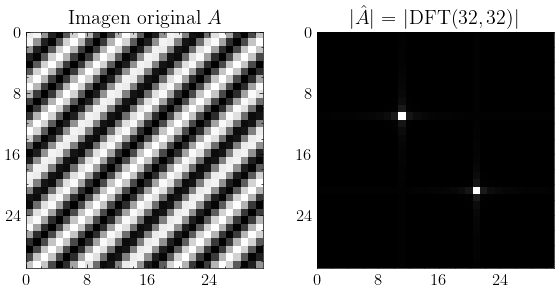

In [41]:
# Suma de cosenos
def cosine_sum(X1, X2, a = 1, b = 1):
    return np.cos((1/a)*X1 + (1/b)*X2)

cosine = lambda X1, X2: cosine_sum(X1, X2, 1, 1)
fig, ax = plot_2dft(
    N=32,
    fun_dft=cosine,
    with_3d_plot=False,
    tick_interval=8,
    save_path=os.path.join("plots", "2dft_cosine.pdf")
)

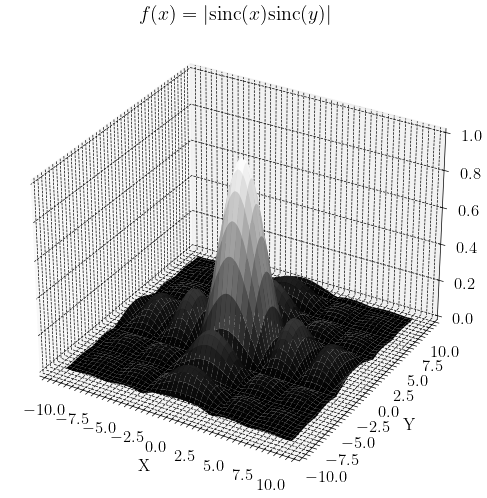

In [42]:
# Función sinc en 3 dimensiones
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# La función sinc de python está normalizada, usamos la versión no normalizada por consistencia con el TFG
def sinc(x):
    return np.sinc(x / np.pi)  

x = np.linspace(-10, 10, 512)
y = np.linspace(-10, 10, 512)
X, Y = np.meshgrid(x, y)
Z = np.abs(sinc(X) * sinc(Y))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(r'$f(x) = |\text{sinc}(x) \text{sinc}(y)|$')

plt.show()


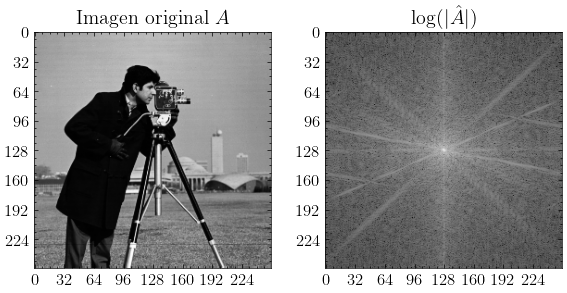

In [43]:
# Imagen cameraman y su DFT
image = plt.imread("cameraman.tiff")
if image.ndim == 3:
    image = np.mean(image, axis=-1)

fig, ax = plot_2dft_image(image, save_path = os.path.join("plots", "2dft_cameraman.pdf"))
plt.show()